In [ ]:
import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
from reco_systems.user_game_matrix import *
from reco_systems.CF_knn import *
from reco_systems.evaluation import *
from copy import *
import matplotlib.pyplot as plt
from itertools import product

%load_ext autoreload
%autoreload 2

folder = "images/error_metrics/hide_full_matrix"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
folder = "database_cleaned"
avis_clean  = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean  = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)
users       = pd.read_csv(f"trictrac_database/users.csv", index_col=0)

min_reviews = 10 # change to set one
rev_filter = filter_df(avis_clean, min_reviews)
center_rev_filter, _ = center_score(rev_filter)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


# Baselines performance

0 0 0
0 1 1
0 2 2
1 0 3
1 1 4
1 2 5


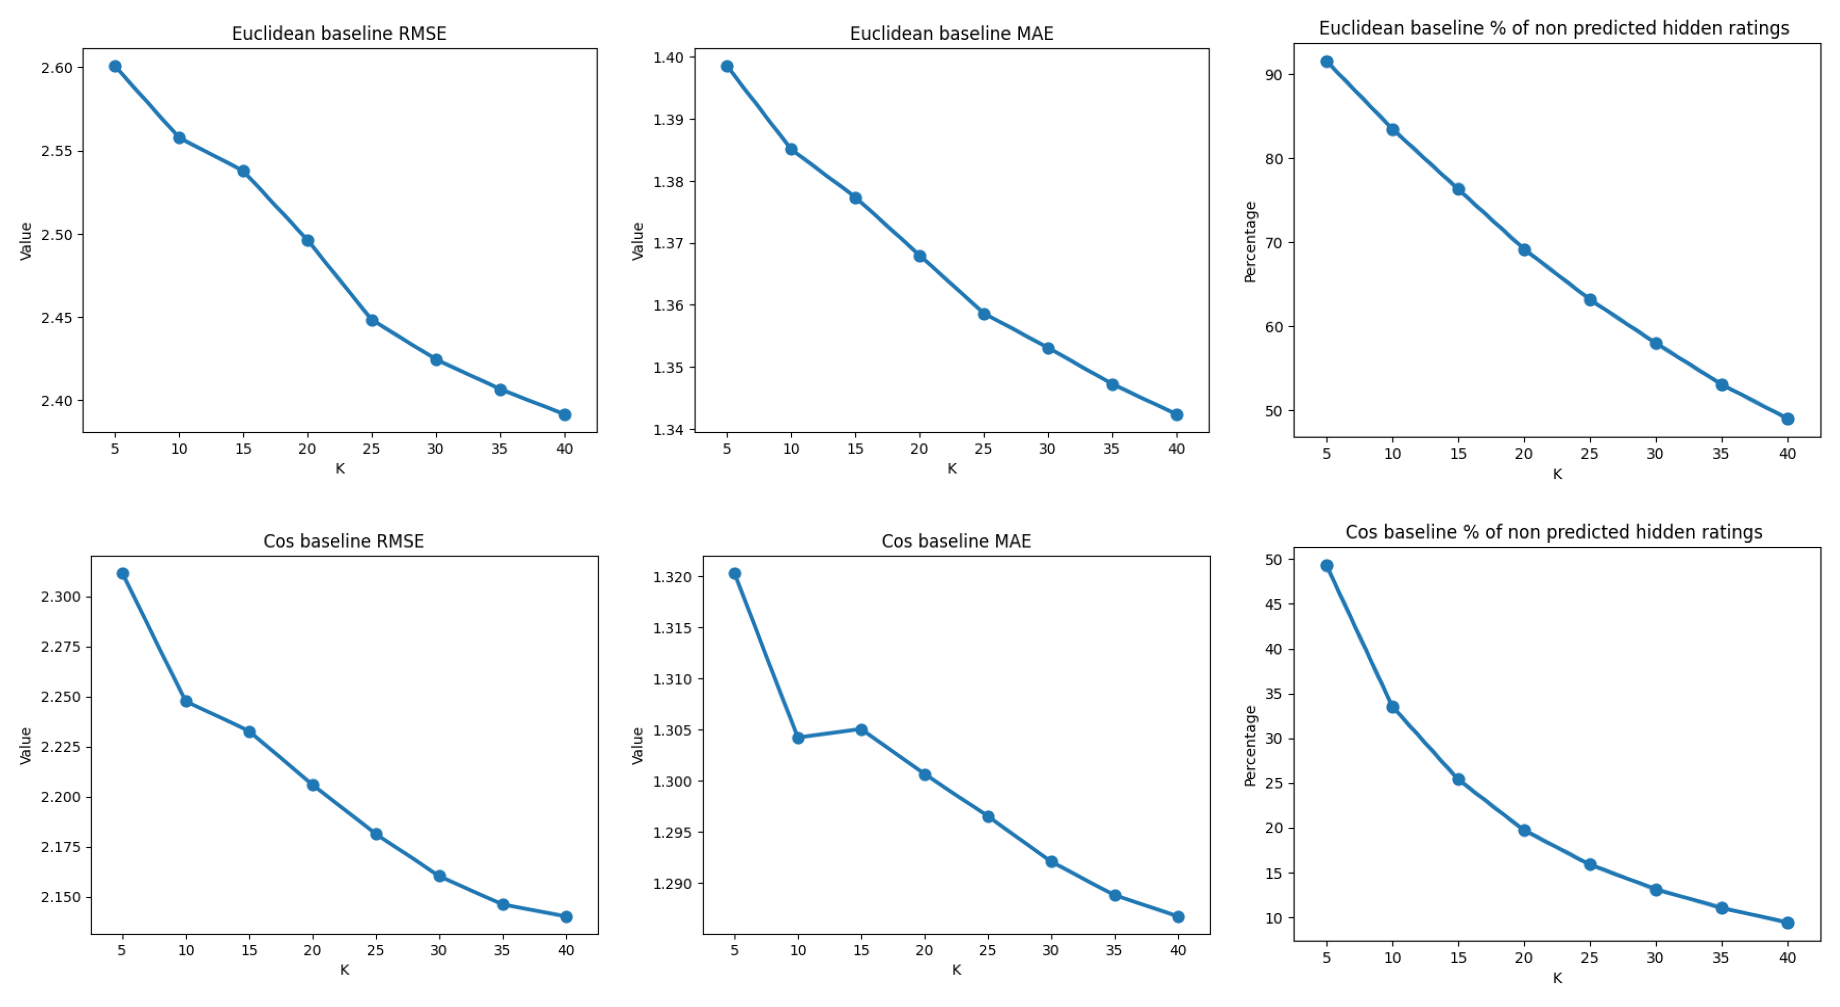

In [182]:
rmse_e = plt.imread(f"{folder}/EB_RMSE.png")
mae_e = plt.imread(f"{folder}/EB_MAE.png")
non_predicted_e = plt.imread(f"{folder}/EB_non_predicted.png")

rmse_c = plt.imread(f"{folder}/CB_RMSE.png")
mae_c = plt.imread(f"{folder}/CB_MAE.png")
non_predicted_c = plt.imread(f"{folder}/CB_non_predicted.png")

images = [rmse_e, mae_e, non_predicted_e, rmse_c, mae_c, non_predicted_c]

fig, ax = plt.subplots(2, 3)

for i, j in product(range(2), range(3)):
    print(i, j, i * 3 + j)
    ax[i, j].imshow(images[i * 3 + j])
    ax[i, j].axis("off")

fig.set_size_inches(18.5, 10.5, forward=True)
fig.set_dpi(100)
fig.tight_layout()

## Centered ratings

0 0 0
0 1 1
0 2 2
1 0 3
1 1 4
1 2 5


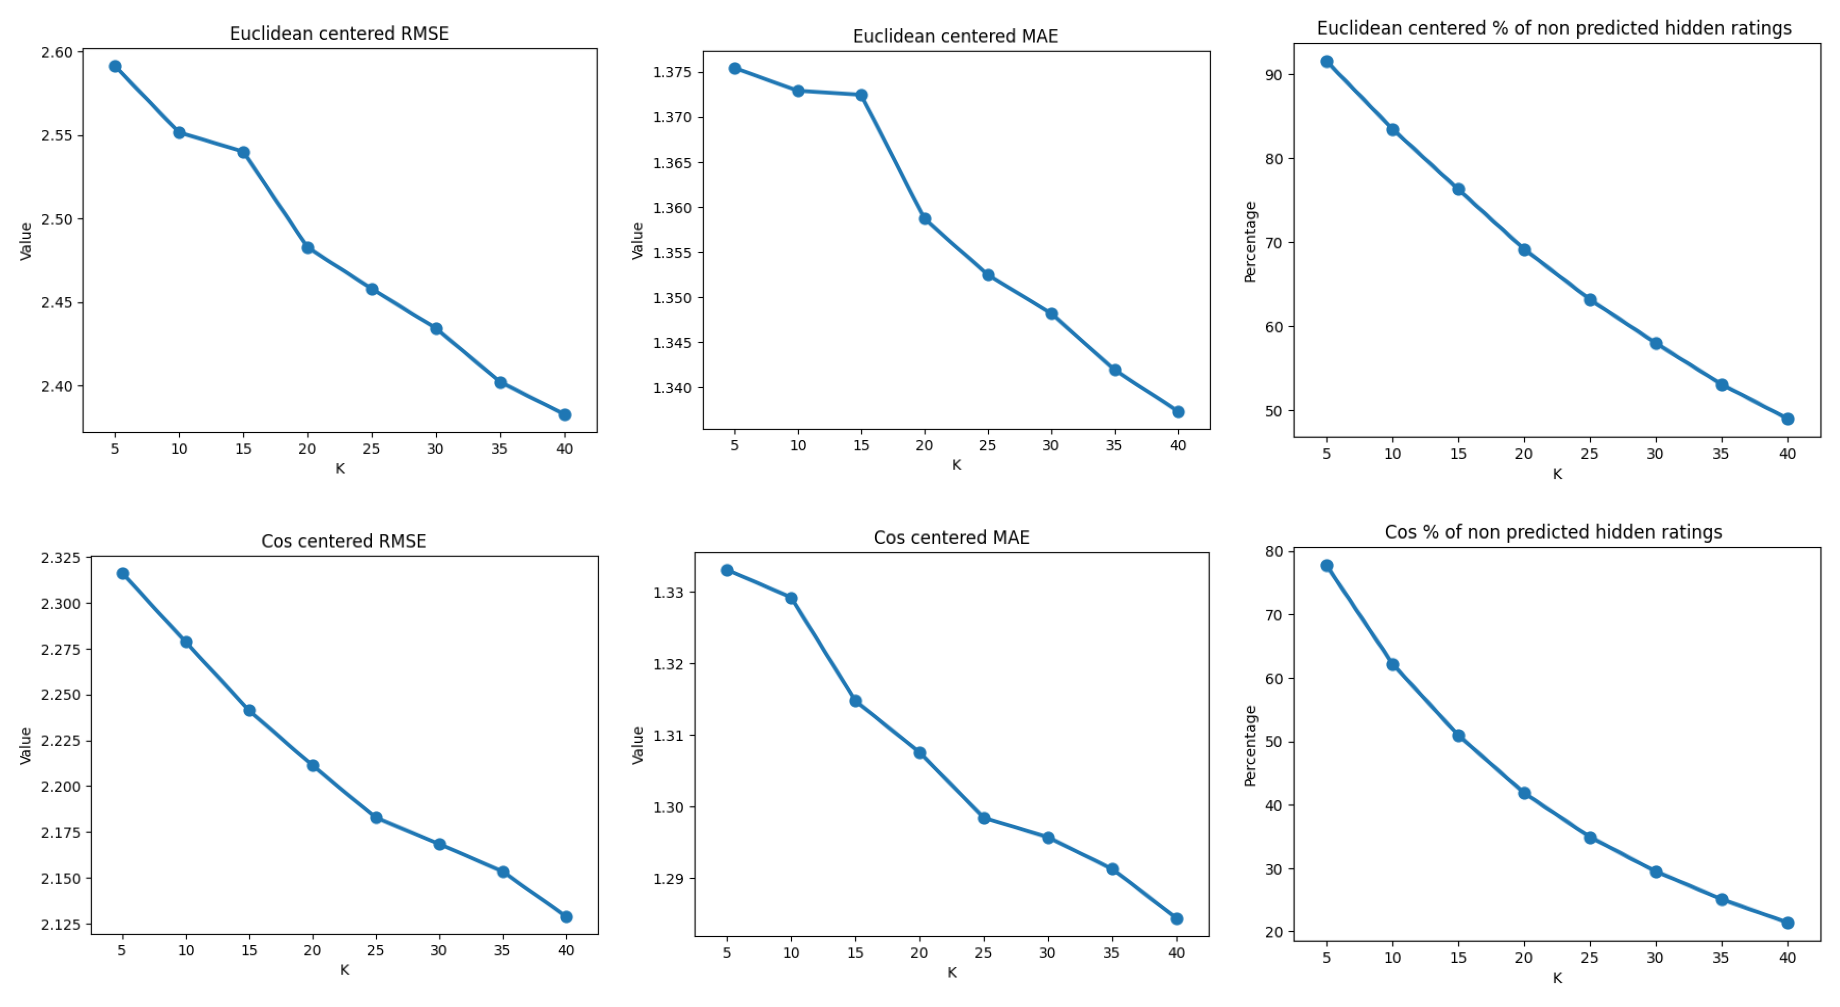

In [203]:
rmse_e = plt.imread(f"{folder}/EC_RMSE.png")
mae_e = plt.imread(f"{folder}/EC_MAE.png")
non_predicted_e = plt.imread(f"{folder}/EC_non_predicted.png")

rmse_c = plt.imread(f"{folder}/CC_RMSE.png")
mae_c = plt.imread(f"{folder}/CC_MAE.png")
non_predicted_c = plt.imread(f"{folder}/CC_non_predicted.png")

images = [rmse_e, mae_e, non_predicted_e, rmse_c, mae_c, non_predicted_c]

fig, ax = plt.subplots(2, 3)

for i, j in product(range(2), range(3)):
    print(i, j, i * 3 + j)
    ax[i, j].imshow(images[i * 3 + j])
    ax[i, j].axis("off")

fig.set_size_inches(18.5, 10.5, forward=True)
fig.set_dpi(100)
fig.tight_layout()

## Distances matrices baseline vs centered

In [244]:
R, M, _, _ = get_matrix_user_game(rev_filter)
RC, _, _, _ = get_matrix_user_game(center_rev_filter)

SE = calc_similarity_matrix(R, M, dist_type="euclidean").toarray()
SC = calc_similarity_matrix(R, M, dist_type="cos")

SEC = calc_similarity_matrix(RC, M, dist_type="euclidean").toarray()
SCC = calc_similarity_matrix(RC, M, dist_type="cos")

SE[SE == 0] = np.inf
SEC[SEC == 0] = np.inf

data = [SE, SC, SEC, SCC]

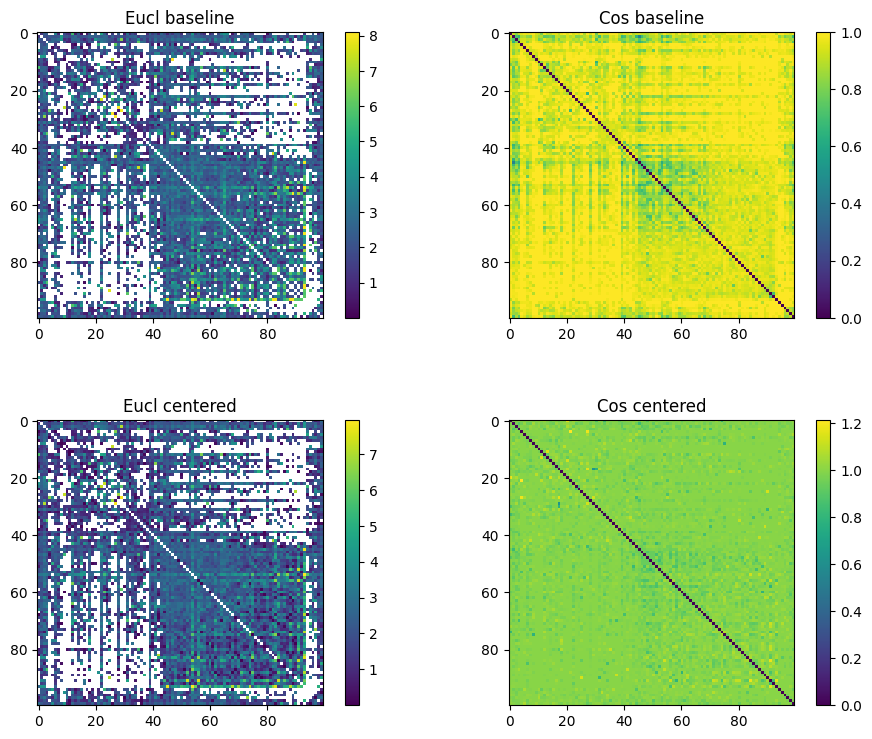

In [256]:
fig, ax = plt.subplots(2, 2)
titles = ["Eucl baseline", "Cos baseline", "Eucl centered", "Cos centered"]
ims = []
for i, j in product(range(2), range(2)):
    im = ax[i, j].imshow(data[i * 2 + j][:100, :100], interpolation='none')
    ax[i, j].set_title(titles[i * 2 + j])
    ims.append(im)

for im in ims:
    
    fig.colorbar(im)

fig.set_dpi(100)
fig.tight_layout()
fig.set_size_inches(10, 8, forward=True)
